ANALISIS EXPLORATORIO DE LOS ARBOLES VOLCADOS EN EL PERIODO 2011 - 2018 DEL ARBOLADO URBANO DE BOGOTA

DIANA MARCELA GUZMAN LUGO -
LEONARDO CAICEDO GIRALDO




**DESCRIPCION DEL PROYECTO:** Analizar los datos disponibles de los arboles volcados en el periodo 2011- 2018 en el Sistema de Información para la Gestión Ambiental Urbana (SIGAU) del JARDÍN BOTÁNICO DE BOGOTÁ (JBB) con el fin de explorar las relaciones entre variables externas y propias del árbol y los incidentes de volcamiento de árboles en la ciudad de Bogotá.

Contexto de Uso de los Datos: Los datos a utilizar se aplicarán para explorar las posibles relaciones entre variables externas y la ocurrencia de volcamientos de árboles en la ciudad de Bogotá. Estos datos incluyen características intrínsecas de los árboles, como altura y densidad, así como ambientales tales como precipitacion y velocidad del viento

**Problemática a Resolver y Valor Agregado**: El proyecto busca abordar el problema de los incidentes relacionados con la caída de árboles en Bogotá, que han ocasionado daños materiales y, en ocasiones, lesiones o incluso la pérdida de vidas. Mediante el análisis de estos datos, se pretende identificar árboles que representen un riesgo para la ciudadanía, permitiendo así tomar medidas preventivas como la tala selectiva, especialmente durante épocas del año con condiciones climáticas adversas, como altas precipitaciones o vientos fuertes.

Dentro de las principales hipótesis que se planteas son que en días de lluvias y vientos fuertes se han reportado mayor caída de árboles, así mismo que arboles de mayor altura causan mayores consecuencias. Finalmente, la persistencia de variables externas (Precipitación y viento) aumentan la probabilidad de volcamiento.


**Descripción del Conjunto de Datos:** El conjunto de datos utilizado proviene del Sistema de Información para la Gestión Ambiental Urbana (SIGAU), en el cual se registran detalles sobre los árboles y los incidentes de volcamiento. Este incluye un identificador único para cada árbol, especie, fechas de actualización y del evento, códigos de localidad y emplazamiento (tales como sistemas hidráulicos, áreas recreativas, sistemas de protección, y vías de circulación), así como datos sobre las características físicas de los árboles (altura, diámetro del tronco y de la copa) y coordenadas geográficas. Además, se incorporan variables externas como la precipitación y velocidad del viento en el día del evento y tres días previos para evaluar posibles correlaciones de persistencia de los vientos o suelos saturados por días continuos de precipitación, junto con mediciones de humedad y densidad aparente del suelo, que podrían influir en la estabilidad de los árboles, tal como se resume en la tabla 1.

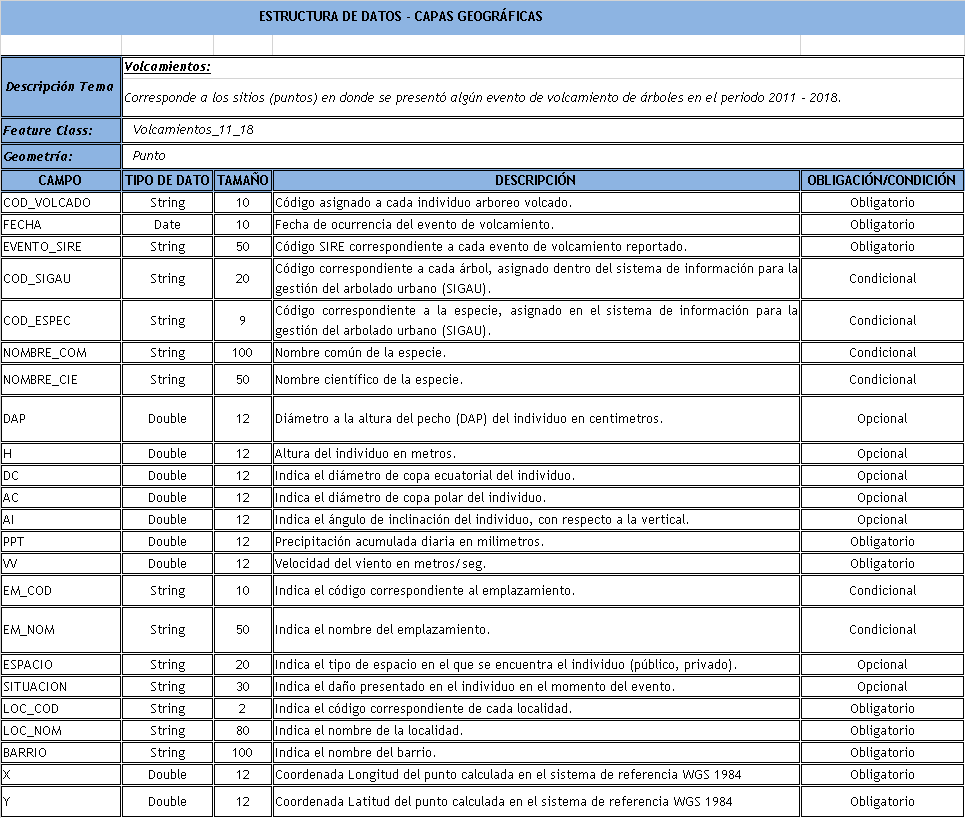

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

ubicacion_archivo = "/content/Volcamientos.xlsx"

# Carga los datos en un DataFrame
df = pd.read_excel(ubicacion_archivo)

#información del dataset con los tipos de datos de las columnas
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    1961 non-null   int64         
 1   COD_VOLCAD  1961 non-null   object        
 2   A├æO        1961 non-null   int64         
 3   FECHA       1920 non-null   datetime64[ns]
 4   EVENTO_SIR  1961 non-null   object        
 5   COD_SIGAU   1961 non-null   object        
 6   COD_ESPEC   1961 non-null   int64         
 7   NOMBRE_COM  1961 non-null   object        
 8   NOMBRE_CIE  1941 non-null   object        
 9   DAP         1961 non-null   float64       
 10  H           1961 non-null   float64       
 11  DC          1961 non-null   float64       
 12  AC          1961 non-null   float64       
 13  AI          1961 non-null   int64         
 14  PPT         1961 non-null   float64       
 15  VV          1961 non-null   float64       
 16  EM_COD      1705 non-nul

In [2]:
con el codigo anterior evidenciamos que algunas caracteristicas de la base de datos presenta datos nulos como por ejeplo en el campo FECHA, en el campo NOMBRE_CIE, EM_COD, EM_NOM

SyntaxError: invalid syntax (<ipython-input-2-c675bb29dfa4>, line 1)

In [3]:
num_filas, num_columnas=df.shape
print(f"Mi dataset tiene {num_filas} filas y {num_columnas} columnas")

Mi dataset tiene 1961 filas y 25 columnas


In [4]:
df=df.copy()

In [5]:
df.duplicated()
indices_duplicados=df.duplicated().sum()
indices_duplicados #No hay duplicados

0

In [6]:
# Verifica si hay datos duplicados y elimínalos
df_sin_duplicados = df.drop_duplicates()

# Muestra la información del DataFrame después de eliminar duplicados
print(df_sin_duplicados.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    1961 non-null   int64         
 1   COD_VOLCAD  1961 non-null   object        
 2   A├æO        1961 non-null   int64         
 3   FECHA       1920 non-null   datetime64[ns]
 4   EVENTO_SIR  1961 non-null   object        
 5   COD_SIGAU   1961 non-null   object        
 6   COD_ESPEC   1961 non-null   int64         
 7   NOMBRE_COM  1961 non-null   object        
 8   NOMBRE_CIE  1941 non-null   object        
 9   DAP         1961 non-null   float64       
 10  H           1961 non-null   float64       
 11  DC          1961 non-null   float64       
 12  AC          1961 non-null   float64       
 13  AI          1961 non-null   int64         
 14  PPT         1961 non-null   float64       
 15  VV          1961 non-null   float64       
 16  EM_COD      1705 non-nul

In [7]:
# Conteo de valores nulos de las columnas
conteo_nulos = df.isnull().sum()

# Muestra el conteo de valores nulos
print(conteo_nulos)

OBJECTID        0
COD_VOLCAD      0
A├æO            0
FECHA          41
EVENTO_SIR      0
COD_SIGAU       0
COD_ESPEC       0
NOMBRE_COM      0
NOMBRE_CIE     20
DAP             0
H               0
DC              0
AC              0
AI              0
PPT             0
VV              0
EM_COD        256
EM_NOM        256
ESPACIO         0
SITUACION       0
LOC_COD         0
LOC_NOM         0
BARRIO          1
X               0
Y               0
dtype: int64


AQUI SE HIZO UN CONTEO DE LOS VALORES NULOS, LOS CAMPOS EM_COD TIENEN 256 Y
EM_NOM 256

In [8]:
null_percentage = df.isnull().sum() / len(df) * 100
null_percentage

OBJECTID       0.000000
COD_VOLCAD     0.000000
A├æO           0.000000
FECHA          2.090770
EVENTO_SIR     0.000000
COD_SIGAU      0.000000
COD_ESPEC      0.000000
NOMBRE_COM     0.000000
NOMBRE_CIE     1.019888
DAP            0.000000
H              0.000000
DC             0.000000
AC             0.000000
AI             0.000000
PPT            0.000000
VV             0.000000
EM_COD        13.054564
EM_NOM        13.054564
ESPACIO        0.000000
SITUACION      0.000000
LOC_COD        0.000000
LOC_NOM        0.000000
BARRIO         0.050994
X              0.000000
Y              0.000000
dtype: float64

AQUI SE VISUALIZA EL PORCENTAJE DE LOS DATOS QUE SON NULOS CON RESPECTO AL TOTAL DE DATOS

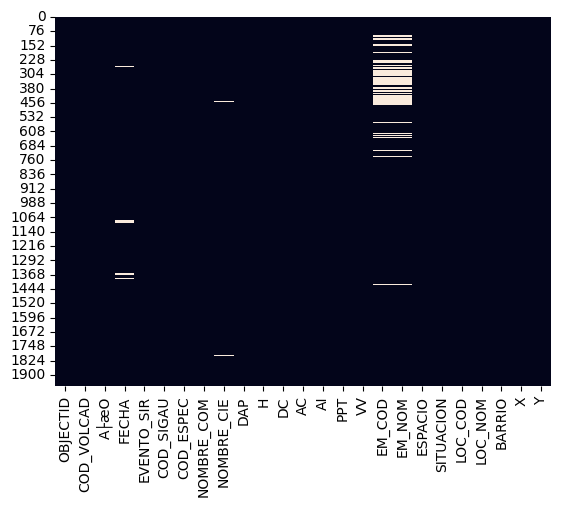

In [9]:
sns.heatmap(df.isnull(), cbar=False)
plt.show()

se eliminan las columnas nombre cientifico porque represenat un data similar a nombre comun asi como codigo especie y de aqui en adelante se analizara como codigo especie. situacion similar se prestan co la columna de EM_NOM que representa la misma informacion de EM_COD y corresponde a codigos de emplazamientos. la variable situacion no presenta una tendencia importante para el analisis dado que su mayoria de registros la categria es "no regista" o "volcado".

In [10]:
df.drop(["NOMBRE_CIE", "EM_NOM", "SITUACION"], axis=1, inplace=True)
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1961 entries, 0 to 1960
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OBJECTID    1961 non-null   int64         
 1   COD_VOLCAD  1961 non-null   object        
 2   A├æO        1961 non-null   int64         
 3   FECHA       1920 non-null   datetime64[ns]
 4   EVENTO_SIR  1961 non-null   object        
 5   COD_SIGAU   1961 non-null   object        
 6   COD_ESPEC   1961 non-null   int64         
 7   NOMBRE_COM  1961 non-null   object        
 8   DAP         1961 non-null   float64       
 9   H           1961 non-null   float64       
 10  DC          1961 non-null   float64       
 11  AC          1961 non-null   float64       
 12  AI          1961 non-null   int64         
 13  PPT         1961 non-null   float64       
 14  VV          1961 non-null   float64       
 15  EM_COD      1705 non-null   object        
 16  ESPACIO     1961 non-nul

con el codigo anterior se borraron las columnas que no eran importantes para nuestro analisis, de esta manera ahorramos espacio de procesamiento

In [11]:
# Muestra las estadísticas resumidas del dataset
estadisticas_resumidas = df.describe(include='all')

# Muestra el resultado
print(estadisticas_resumidas)

           OBJECTID COD_VOLCAD         A├æO                FECHA   EVENTO_SIR  \
count   1961.000000       1961  1961.000000                 1920         1961   
unique          NaN       1961          NaN                  NaN         1611   
top             NaN         V1          NaN                  NaN  NO REGISTRA   
freq            NaN          1          NaN                  NaN          196   
mean     981.000000        NaN  2015.671086  2016-02-20 06:48:00          NaN   
min        1.000000        NaN  2011.000000  2011-01-24 00:00:00          NaN   
25%      491.000000        NaN  2014.000000  2014-08-28 18:00:00          NaN   
50%      981.000000        NaN  2016.000000  2016-04-19 00:00:00          NaN   
75%     1471.000000        NaN  2017.000000  2017-10-31 06:00:00          NaN   
max     1961.000000        NaN  2018.000000  2018-12-26 00:00:00          NaN   
std      566.236258        NaN     1.857534                  NaN          NaN   

          COD_SIGAU    COD_

con el codigo anterior se hace una descripcion estadistica de los campos, se muestran maximos, minimos, desviacion estandar, cuartiles, promedio

In [12]:
estadisticas_resumidas_numericas = df.describe(include=[np.number])
print(estadisticas_resumidas_numericas)

          OBJECTID         A├æO    COD_ESPEC          DAP            H  \
count  1961.000000  1961.000000  1961.000000  1961.000000  1961.000000   
mean    981.000000  2015.671086    63.434472     0.348781     6.382008   
std     566.236258     1.857534    63.759688     0.483992     6.495810   
min       1.000000  2011.000000     0.000000     0.000000     0.000000   
25%     491.000000  2014.000000    25.000000     0.000000     0.000000   
50%     981.000000  2016.000000    37.000000     0.200000     6.000000   
75%    1471.000000  2017.000000    94.000000     0.520000     9.054142   
max    1961.000000  2018.000000   386.000000     5.380000    75.000000   

                DC           AC           AI          PPT           VV  \
count  1961.000000  1961.000000  1961.000000  1961.000000  1961.000000   
mean      2.667302     2.222814     2.153493     3.624528     3.358593   
std       4.003831     3.590336     4.763852     5.809518     0.854250   
min       0.000000     0.000000     0

con este codigo mostramos las caracteristica de tipo estadistico solo para los campos numeericcos que pueden ser util para nuestro analisis


In [13]:
nombres_columnas = df.columns
print(nombres_columnas)

Index(['OBJECTID', 'COD_VOLCAD', 'A├æO', 'FECHA', 'EVENTO_SIR', 'COD_SIGAU',
       'COD_ESPEC', 'NOMBRE_COM', 'DAP', 'H', 'DC', 'AC', 'AI', 'PPT', 'VV',
       'EM_COD', 'ESPACIO', 'LOC_COD', 'LOC_NOM', 'BARRIO', 'X', 'Y'],
      dtype='object')


con este codigo obtenemos el nombre de las caracterisitcias de nuestro dataset

In [14]:
categoricas=['NOMBRE_COM', 'ESPACIO', 'LOC_COD', 'LOC_NOM',
       'BARRIO']
for columna in categoricas:
    # Muestra por cada clase disponible en la variable categórica
    print(f"Muestras por clase en {columna}:")
    print(df[columna].value_counts())
    print()

Muestras por clase en NOMBRE_COM:
NOMBRE_COM
Acacia negra, gris    253
Acacia japonesa       208
Acacia morada         176
Caucho sabanero       122
Sauco                 120
                     ... 
Palma de datiles        1
Borrachero              1
Arboloco                1
Manzano                 1
Pomarroso               1
Name: count, Length: 99, dtype: int64

Muestras por clase en ESPACIO:
ESPACIO
PUBLICO              872
NO REGISTRA          862
PRIVADO              105
Publico               56
publico               38
Privado               26
PUBLICO Y PRIVADO      1
privado                1
Name: count, dtype: int64

Muestras por clase en LOC_COD:
LOC_COD
11    429
1     329
10    223
2     168
13    127
9     122
8      96
16     92
4      61
3      51
12     51
18     38
15     30
14     27
5      26
7      26
19     26
6      20
17     19
Name: count, dtype: int64

Muestras por clase en LOC_NOM:
LOC_NOM
SUBA                        429
USAQUEN                     329
ENGAT

en este codigo observamos nuestras variables cateogricas y se realiza n coteo para cada una de ellas, observamos qe el arbol de tipo acacia es el arbol que mas volcamietos a presentado con 253, la localida de suba es el sector donde mas volcamientos se han presentado, y mas exactamente en la urbanizacion chico norte con 22 eventos

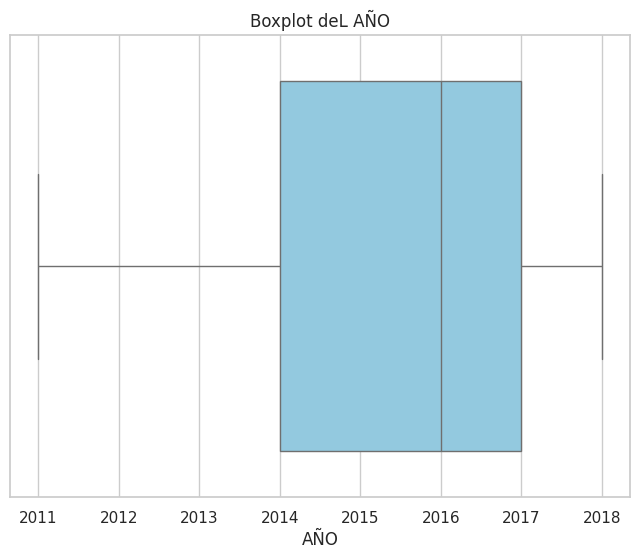

In [15]:
###Para las variables númericas se realiza un boxplot.
# Configurar el estilo de seaborn
sns.set(style="whitegrid")
#boxplot con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["A├æO"], color='skyblue')
plt.title('Boxplot deL AÑO')
plt.xlabel('AÑO')
plt.show()

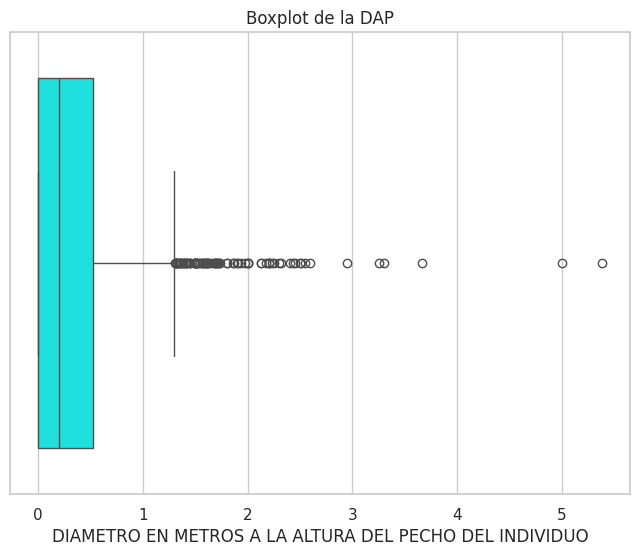

In [16]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")
#boxplot con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["DAP"], color="cyan")
plt.title('Boxplot de la DAP')
plt.xlabel('DIAMETRO EN METROS A LA ALTURA DEL PECHO DEL INDIVIDUO')
plt.show()

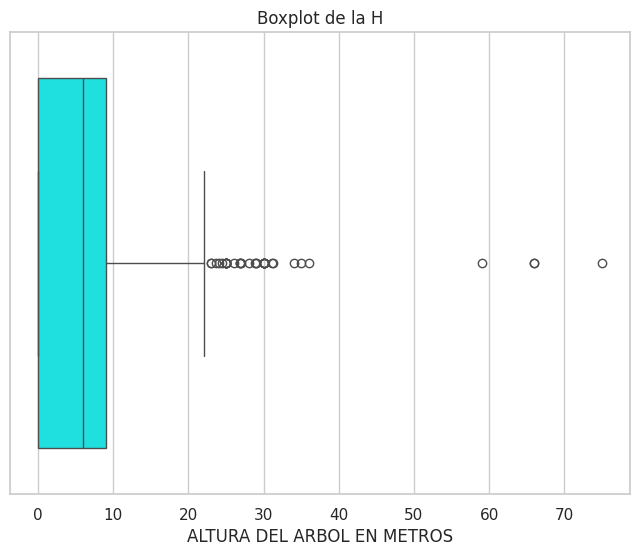

In [17]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")
#boxplot con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["H"], color="cyan")
plt.title('Boxplot de la H')
plt.xlabel('ALTURA DEL ARBOL EN METROS')
plt.show()

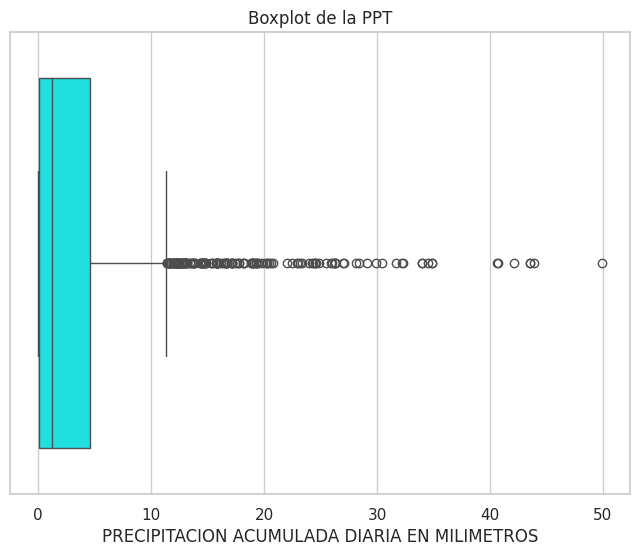

In [18]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")
#boxplot con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["PPT"], color="cyan")
plt.title('Boxplot de la PPT')
plt.xlabel('PRECIPITACION ACUMULADA DIARIA EN MILIMETROS')
plt.show()

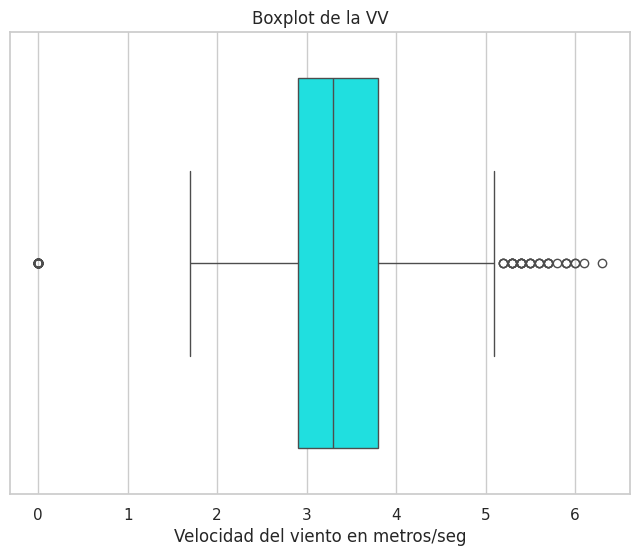

In [19]:
# Configurar el estilo de seaborn
sns.set(style="whitegrid")
#boxplot con seaborn
plt.figure(figsize=(8, 6))
sns.boxplot(x=df["VV"], color="cyan")
plt.title('Boxplot de la VV')
plt.xlabel('Velocidad del viento en metros/seg')
plt.show()

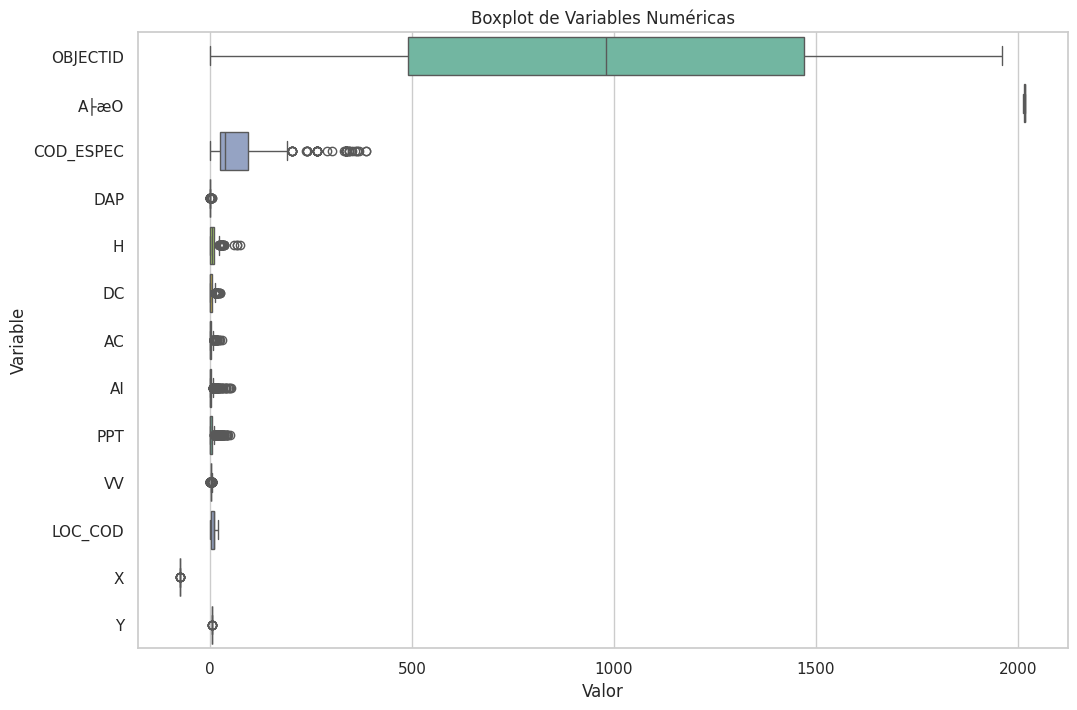

In [20]:
# Seleccionar solo las variables numéricas
num_vars= df.select_dtypes(include=['int64', 'float64'])#Contar la cantidad de variables numericas
plt.figure(figsize=(12, 8))
sns.set(style="whitegrid")
# boxplot para cada variable numérica
sns.boxplot(data=num_vars, orient='h', palette='Set2')
plt.title('Boxplot de Variables Numéricas')
plt.xlabel('Valor')
plt.ylabel('Variable')
plt.show()

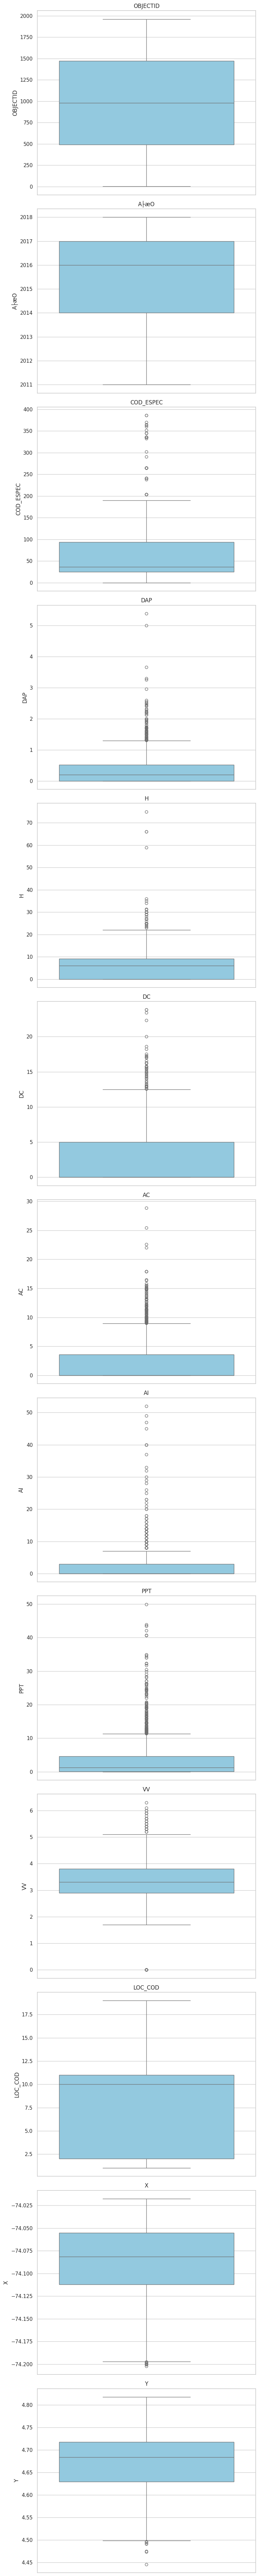

In [21]:
# Seleccionar solo las variables numéricas
numeric_vars = df.select_dtypes(include=['int64', 'float64'])
num_vars = len(numeric_vars.columns) #Contar la cantidad de variables numericas
fig, axes = plt.subplots(nrows=num_vars, ncols=1, figsize=(8, 6*num_vars)) #tamaño

# Iterar sobre las variables numéricas y crear un boxplot para cada una
for i, (columna, datos) in enumerate(numeric_vars.items()):
    sns.boxplot(y=datos, ax=axes[i], color='skyblue')
    axes[i].set_title(columna)
    axes[i].set_ylabel(columna)

# Ajustar el diseño de las subtramas
plt.tight_layout()

# Mostrar el gráfico
plt.show()

In [22]:
# Conteo de valores nulos de las columnas
conteo_nulos = df.isnull().sum()

# Muestra el conteo de valores nulos
print(conteo_nulos)

OBJECTID        0
COD_VOLCAD      0
A├æO            0
FECHA          41
EVENTO_SIR      0
COD_SIGAU       0
COD_ESPEC       0
NOMBRE_COM      0
DAP             0
H               0
DC              0
AC              0
AI              0
PPT             0
VV              0
EM_COD        256
ESPACIO         0
LOC_COD         0
LOC_NOM         0
BARRIO          1
X               0
Y               0
dtype: int64


Como los datos faltantes son pocos, se llenaran los categoricos con la moda y los numericos con la media, en el caso de EM,COD, Se llenaran datos nulos con la palabra "sin informaion"

In [23]:
df['EM_COD'].fillna("SIN INFORMACION", inplace=True)
print(df)

      OBJECTID COD_VOLCAD  A├æO      FECHA   EVENTO_SIR       COD_SIGAU  \
0            1         V1  2011 2011-01-24       109721  03010602000135   
1            2         V2  2011 2011-01-28       109818  13021201000023   
2            3         V3  2011 2011-03-25       111176  10010402000044   
3            4         V4  2011 2011-03-25       111180  16021202000032   
4            5         V5  2011 2011-03-26  2011ER36684  06020201000152   
...        ...        ...   ...        ...          ...             ...   
1956      1957      V1957  2018 2018-12-21      5249260  03020102000011   
1957      1958      V1958  2018 2018-12-21  NO REGISTRA     NO REGISTRA   
1958      1959      V1959  2018 2018-12-21      5249271  16010201000531   
1959      1960      V1960  2018 2018-12-22      5249362     NO REGISTRA   
1960      1961      V1961  2018 2018-12-26      5249645     NO REGISTRA   

      COD_ESPEC                       NOMBRE_COM       DAP          H  ...  \
0             3      

In [24]:
# Conteo de valores nulos de las columnas
conteo_nulos = df.isnull().sum()

# Muestra el conteo de valores nulos
print(conteo_nulos)


OBJECTID       0
COD_VOLCAD     0
A├æO           0
FECHA         41
EVENTO_SIR     0
COD_SIGAU      0
COD_ESPEC      0
NOMBRE_COM     0
DAP            0
H              0
DC             0
AC             0
AI             0
PPT            0
VV             0
EM_COD         0
ESPACIO        0
LOC_COD        0
LOC_NOM        0
BARRIO         1
X              0
Y              0
dtype: int64


In [25]:
# Calcular la moda global de la columna 'EM_COD'
moda_global_em_cod = df['BARRIO'].mode()[0]

# Imputar los valores faltantes en 'EM_COD' con la moda global
df['BARRIO'].fillna(moda_global_em_cod, inplace=True)

# Mostrar el DataFrame actualizado
print(df)

      OBJECTID COD_VOLCAD  A├æO      FECHA   EVENTO_SIR       COD_SIGAU  \
0            1         V1  2011 2011-01-24       109721  03010602000135   
1            2         V2  2011 2011-01-28       109818  13021201000023   
2            3         V3  2011 2011-03-25       111176  10010402000044   
3            4         V4  2011 2011-03-25       111180  16021202000032   
4            5         V5  2011 2011-03-26  2011ER36684  06020201000152   
...        ...        ...   ...        ...          ...             ...   
1956      1957      V1957  2018 2018-12-21      5249260  03020102000011   
1957      1958      V1958  2018 2018-12-21  NO REGISTRA     NO REGISTRA   
1958      1959      V1959  2018 2018-12-21      5249271  16010201000531   
1959      1960      V1960  2018 2018-12-22      5249362     NO REGISTRA   
1960      1961      V1961  2018 2018-12-26      5249645     NO REGISTRA   

      COD_ESPEC                       NOMBRE_COM       DAP          H  ...  \
0             3      

In [26]:
# Conteo de valores nulos de las columnas
conteo_nulos = df.isnull().sum()

# Muestra el conteo de valores nulos
print(conteo_nulos)

OBJECTID       0
COD_VOLCAD     0
A├æO           0
FECHA         41
EVENTO_SIR     0
COD_SIGAU      0
COD_ESPEC      0
NOMBRE_COM     0
DAP            0
H              0
DC             0
AC             0
AI             0
PPT            0
VV             0
EM_COD         0
ESPACIO        0
LOC_COD        0
LOC_NOM        0
BARRIO         0
X              0
Y              0
dtype: int64


el unico dato faltante de barrio se lleno con la moda

In [27]:
# 1. EXTRAER EL MES DESDE LA FECHA
if not 'mes' in df.columns:  #VERIFICA SI HAY MES
    df['mes'] = pd.to_datetime(df['FECHA']).dt.month

# 2. CONTEO DE EVENTOS POR MES
total_events_per_month = df.groupby('mes')['COD_VOLCAD'].count()

# 3. MUESTRA LA TABLA POR MESES
print("Total eventos por mes (Tabla):")
print(total_events_per_month.to_string())

Total eventos por mes (Tabla):
mes
1.0      99
2.0     103
3.0     207
4.0     289
5.0     211
6.0     167
7.0     168
8.0     136
9.0      94
10.0    123
11.0    215
12.0    108


se hace conteo por mes de el numero de eventos para conocer el mes en con mas numero de volcaientos

In [28]:
# Convertir el número de mes a nombre de mes
df['nombre_mes'] = pd.to_datetime(df['FECHA']).dt.strftime('%B')

# Conteo de eventos por mes
total_events_per_month = df.groupby('nombre_mes')['COD_VOLCAD'].count()

# Muestra la tabla por meses con nombres
print("Total eventos por mes (Tabla):")
print(total_events_per_month.to_string())

Total eventos por mes (Tabla):
nombre_mes
April        289
August       136
December     108
February     103
January       99
July         168
June         167
March        207
May          211
November     215
October      123
September     94


PUNTO 1. DESCRIPCION DE CONTEO DE RBOLES POR GRUPOS DE ESPECIE, LOCALIDAD


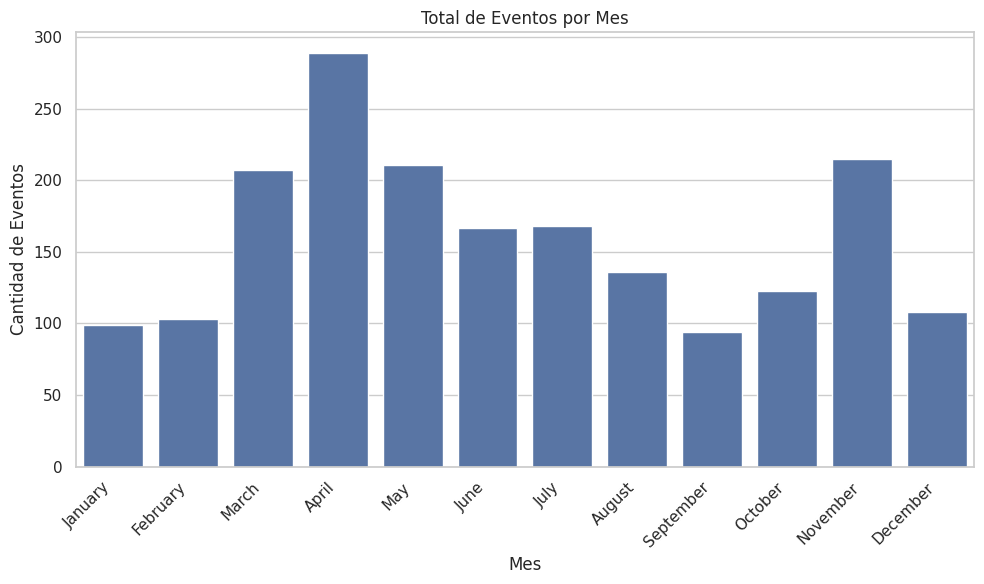

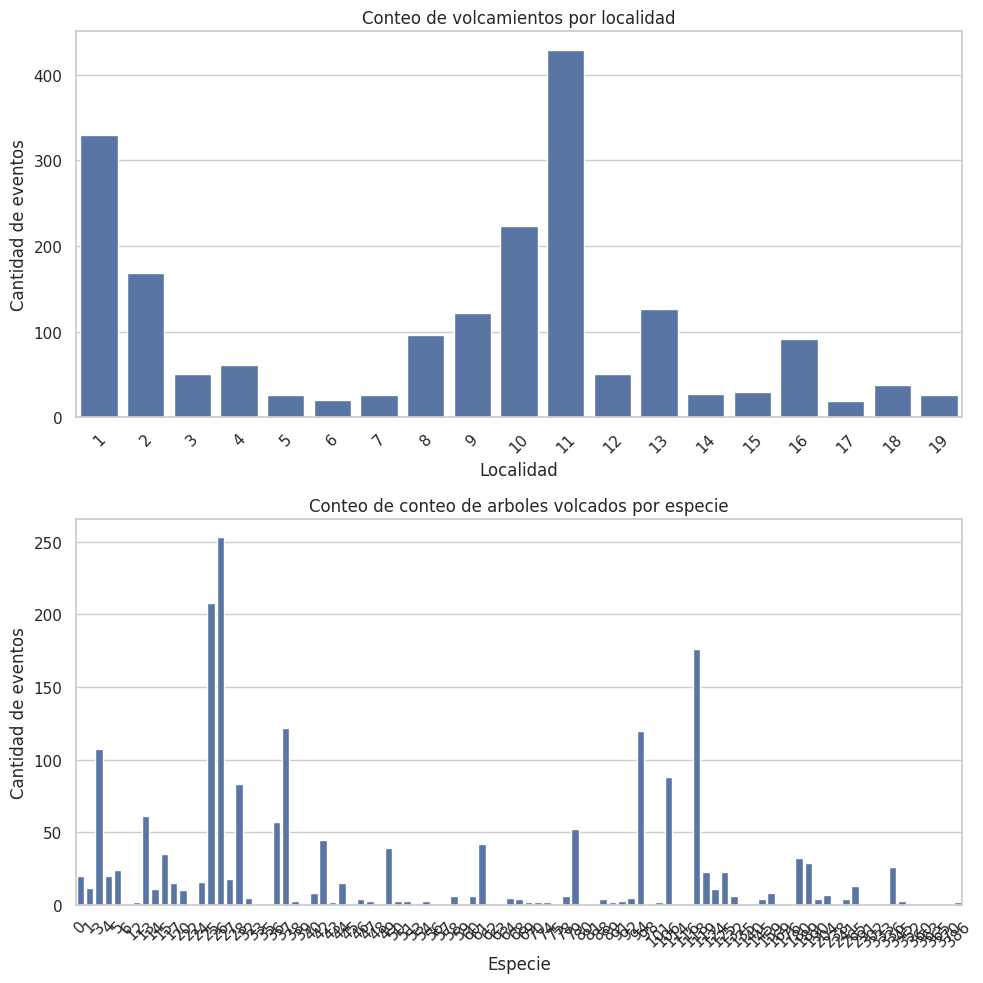

In [29]:
# Ordenar los meses en el orden deseado
ordered_months = total_events_per_month.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=ordered_months.index, y=ordered_months.values)

# Ajustar etiquetas y título
plt.xticks(rotation=45, ha='right')
plt.xlabel('Mes')
plt.ylabel('Cantidad de Eventos')
plt.title('Total de Eventos por Mes')

# Mostrar el gráfico
plt.tight_layout()
plt.show()


# Conteo de COD_VOL por localidad LOC_COD
conteo_por_localidad = df.groupby('LOC_COD')['COD_VOLCAD'].count()

# Conteo de COD_VOL por especie COD_ESPEC
conteo_por_especie = df.groupby('COD_ESPEC')['COD_VOLCAD'].count()

# Configuración de estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# Diagrama de barras para el conteo por localidad
sns.barplot(x=conteo_por_localidad.index, y=conteo_por_localidad.values, ax=axs[0])
axs[0].set_title('Conteo de volcamientos por localidad')
axs[0].set_xlabel('Localidad')
axs[0].set_ylabel('Cantidad de eventos')
axs[0].tick_params(axis='x', rotation=45)

# Diagrama de barras para el conteo por especie
sns.barplot(x=conteo_por_especie.index, y=conteo_por_especie.values, ax=axs[1])
axs[1].set_title('Conteo de conteo de arboles volcados por especie')
axs[1].set_xlabel('Especie')
axs[1].set_ylabel('Cantidad de eventos')
axs[1].tick_params(axis='x', rotation=45)

# Ajustar diseño
plt.tight_layout()
plt.show()

el mes con mayor numero de evento es abril, y el que menos numero de eventos es noviembre

PUNTO 2. ANALISIS EXPLORATORIO DE VARIABLES AMBIENTALES


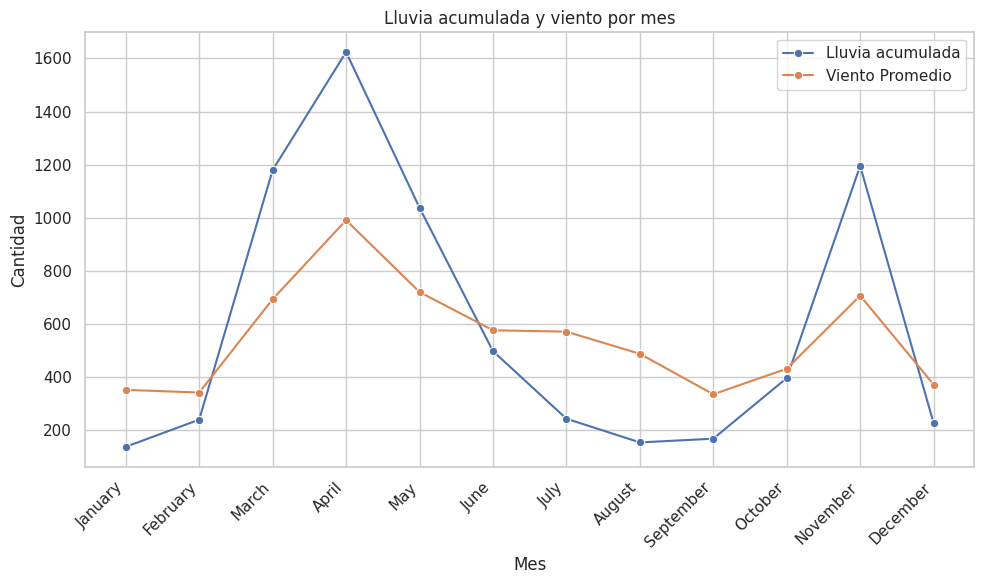

In [30]:
# Agrupar los datos por mes y sumar la lluvia y el viento
monthly_sum = df.groupby('nombre_mes')[['PPT', 'VV']].sum()

# Reordenar los meses
ordered_months = monthly_sum.reindex(['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'])

# Configurar el estilo de seaborn
sns.set(style="whitegrid")

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar la lluvia acumulada
sns.lineplot(data=ordered_months['PPT'], marker='o', label='Lluvia acumulada')

# Graficar el viento
sns.lineplot(data=ordered_months['VV'], marker='o', label='Viento Promedio')

# Ajustar etiquetas y título
plt.xlabel('Mes')
plt.ylabel('Cantidad')
plt.title('Lluvia acumulada y viento por mes')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar la leyenda
plt.legend()

# Mostrar la gráfica
plt.tight_layout()
plt.show()



en esta grafica se evidencia que los meses con mayor viento promedio y mayor presipitacion con cuerdan con llos meses que mas lluvias se presentan abril y septiembre

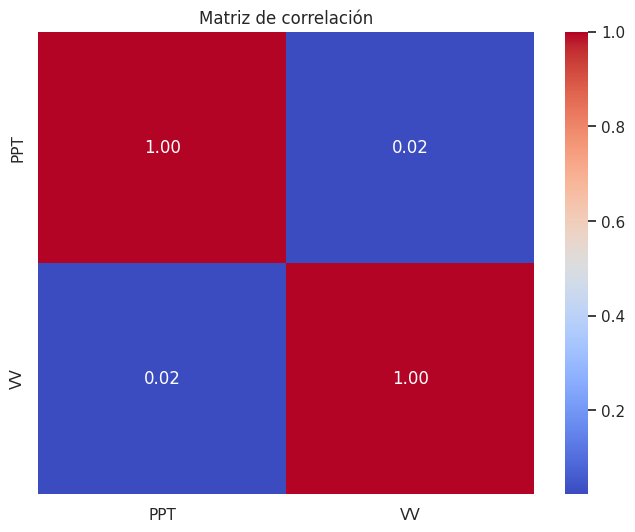

In [31]:

# Cargar el archivo Volcamiento.XLSX en un DataFrame
combined_df = pd.read_excel('/content/Volcamientos.xlsx')


# Calcular la correlación entre las variables
correlation = combined_df[['COD_VOLCAD', 'PPT', 'VV']].corr(numeric_only=True)

# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

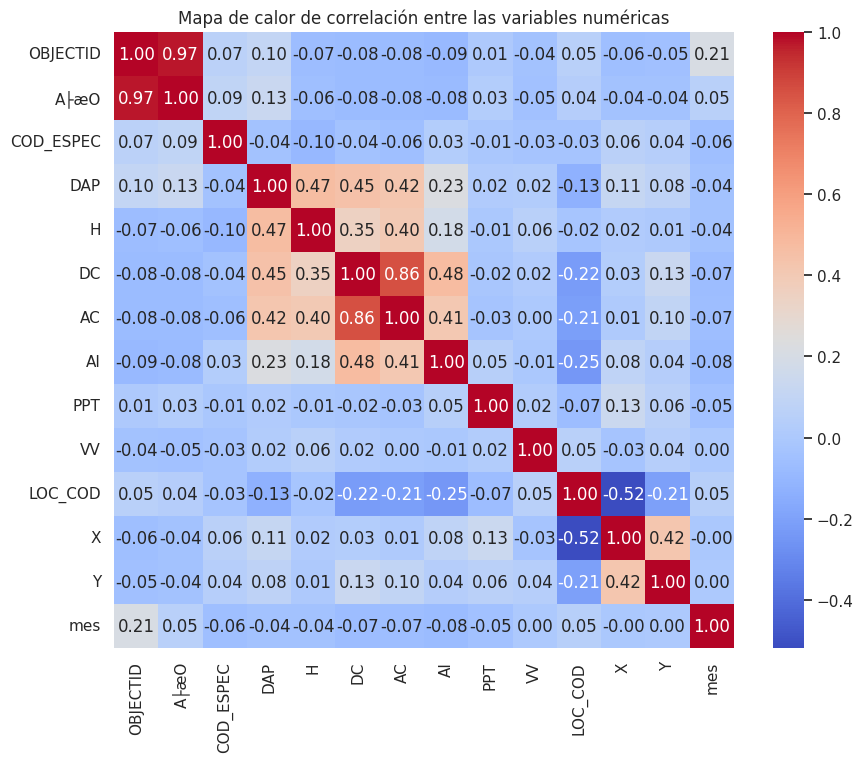

In [32]:



# Filtrar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int', 'float'])

# Calcula la matriz de correlación
correlation_matrix = numeric_columns.corr()

# Crea un mapa de calor utilizando seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f",
            xticklabels=correlation_matrix.columns, yticklabels=correlation_matrix.columns)
plt.title('Mapa de calor de correlación entre las variables numéricas')
plt.show()

Matriz de correlación para datos mensuales:
            COD_VOLCAD       PPT        VV
COD_VOLCAD    1.000000  0.937301 -0.486145
PPT           0.937301  1.000000 -0.549577
VV           -0.486145 -0.549577  1.000000


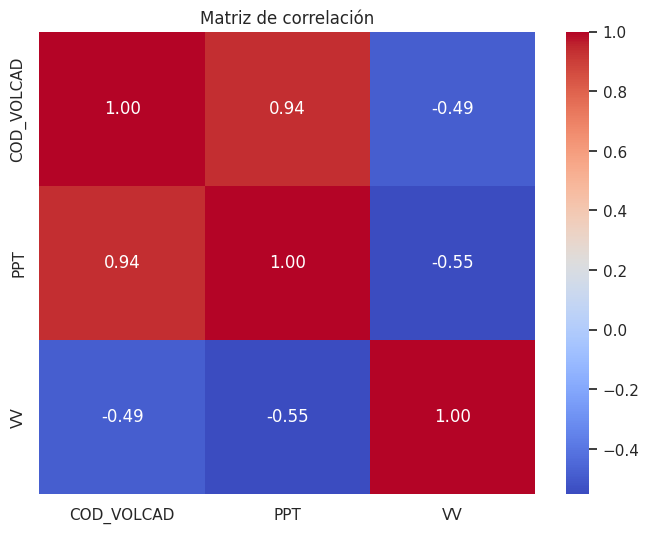

In [33]:
# Agrupar los datos por mes y calcular el conteo de eventos de volcamiento, suma de PPT y media de VV
monthly_data = df.groupby('mes').agg({
    'COD_VOLCAD': 'count',
    'PPT': 'sum',
    'VV': 'mean'
})

# Calcular la matriz de correlación para los datos mensuales
monthly_correlation = monthly_data.corr()

# Visualizar la matriz de correlación
print("Matriz de correlación para datos mensuales:")
print(monthly_correlation)
# Mostrar la matriz de correlación como un mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(monthly_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de correlación')
plt.show()

PUNTO 3. ANALISIS EXPLORATORIO DE LOS DATOS PROPIOS DEL ARBOL

Por mes

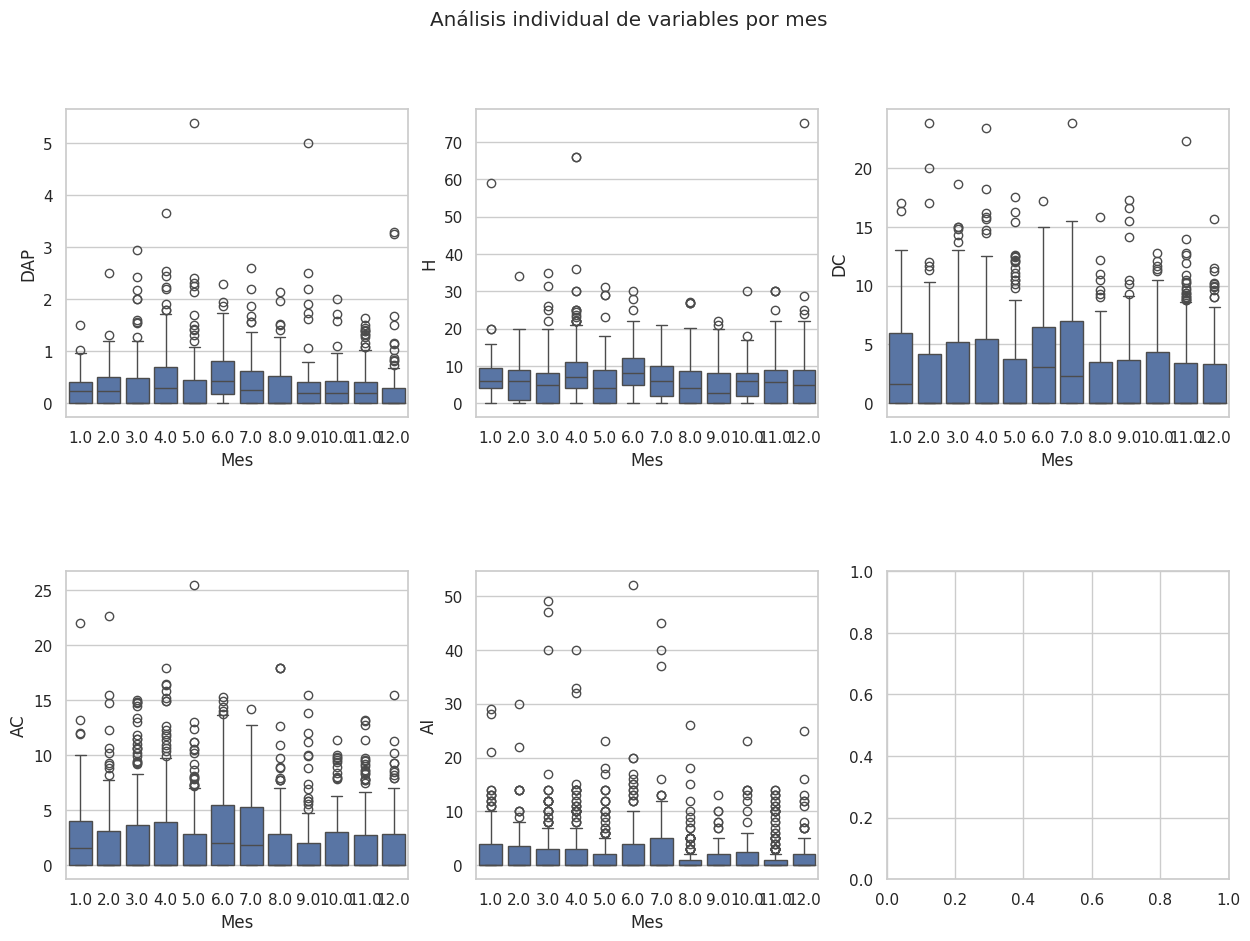

In [34]:
df_mes = df.groupby('mes')

# Crear un subplot con 2 filas y 3 columnas
fig, axes = plt.subplots(2, 3, figsize=(15, 10))

# Crear un gráfico para cada variable en un subplot
sns.boxplot(x='mes', y='DAP', data=df, ax=axes[0, 0])
sns.boxplot(x='mes', y='H', data=df, ax=axes[0, 1])
sns.boxplot(x='mes', y='DC', data=df, ax=axes[0, 2])
sns.boxplot(x='mes', y='AC', data=df, ax=axes[1, 0])
sns.boxplot(x='mes', y='AI', data=df, ax=axes[1, 1])

# Ajustar etiquetas y títulos
for ax, variable in zip(axes.flatten(), ['DAP', 'H', 'DC', 'AC', 'AI']):
    ax.set_xlabel('Mes')
    ax.set_ylabel(variable)

# Agregar un título general
plt.suptitle('Análisis individual de variables por mes')

# Ajustar espacio entre subplots
plt.subplots_adjust(hspace=0.5)

# Mostrar el gráfico
plt.show()

In [35]:
summary_by_month = df.groupby('mes').describe()

# Mostrar los resultados en tablas
for variable in ['DAP', 'H', 'DC', 'AC', 'AI']:
    print(f"\nTabla de estadísticas descriptivas para {variable} por mes:")
    display(summary_by_month[variable])


Tabla de estadísticas descriptivas para DAP por mes:


,count,mean,min,25%,50%,75%,max,std
mes,,,,,,,,
1.0,99.0,0.280771,0.0,0.000000,0.229183,0.400000,1.50,0.297867
2.0,103.0,0.310032,0.0,0.000000,0.240000,0.500000,2.51,0.383328
3.0,207.0,0.320111,0.0,0.000000,0.000000,0.490000,2.95,0.488574
4.0,289.0,0.447926,0.0,0.000000,0.300000,0.690000,3.66,0.527058
5.0,211.0,0.316899,0.0,0.000000,0.000000,0.450000,5.38,0.583157
6.0,167.0,0.529727,0.0,0.184619,0.432900,0.820000,2.30,0.467484
7.0,168.0,0.390665,0.0,0.000000,0.254647,0.612500,2.59,0.461208
8.0,136.0,0.296060,0.0,0.000000,0.000000,0.522098,2.13,0.471943
9.0,94.0,0.371496,0.0,0.000000,0.200000,0.400000,5.00,0.675167



Tabla de estadísticas descriptivas para H por mes:


,count,mean,min,25%,50%,75%,max,std
mes,,,,,,,,
1.0,99.0,7.138647,0.0,4.000000,6.000000,9.471019,59.000000,6.971099
2.0,103.0,6.113344,0.0,0.921678,6.000000,9.000000,34.000000,5.294154
3.0,207.0,5.620956,0.0,0.000000,5.000000,8.130096,35.000000,6.202919
4.0,289.0,8.125271,0.0,4.000000,7.000000,11.000000,66.000000,7.921857
5.0,211.0,5.383063,0.0,0.000000,4.000000,9.000000,31.092987,6.107834
6.0,167.0,8.523511,0.0,5.000000,8.000000,12.000000,30.000000,5.540444
7.0,168.0,6.309954,0.0,2.072380,6.000000,10.000000,21.000000,4.934688
8.0,136.0,5.450828,0.0,0.000000,4.023806,8.625000,27.000000,6.243449
9.0,94.0,4.696354,0.0,0.000000,2.750000,8.000000,22.000000,5.967824



Tabla de estadísticas descriptivas para DC por mes:


,count,mean,min,25%,50%,75%,max,std
mes,,,,,,,,
1.0,99.0,3.264949,0.0,0.0,1.60,5.9500,17.03,4.037908
2.0,103.0,2.680874,0.0,0.0,0.00,4.2000,23.80,4.542569
3.0,207.0,2.863575,0.0,0.0,0.00,5.2000,18.60,4.183660
4.0,289.0,2.894291,0.0,0.0,0.00,5.5000,23.40,4.211655
5.0,211.0,2.276398,0.0,0.0,0.00,3.7500,17.50,3.819914
6.0,167.0,3.693713,0.0,0.0,3.10,6.5000,17.20,4.139060
7.0,168.0,3.909940,0.0,0.0,2.35,7.0250,23.80,4.510870
8.0,136.0,1.873162,0.0,0.0,0.00,3.5000,15.80,3.114350
9.0,94.0,2.249787,0.0,0.0,0.00,3.6500,17.30,4.123383



Tabla de estadísticas descriptivas para AC por mes:


,count,mean,min,25%,50%,75%,max,std
mes,,,,,,,,
1.0,99.0,2.715394,0.0,0.0,1.596206,4.060302,22.000000,3.758911
2.0,103.0,2.299546,0.0,0.0,0.000000,3.146853,22.597588,4.018914
3.0,207.0,2.354831,0.0,0.0,0.000000,3.667815,15.034334,3.815264
4.0,289.0,2.372729,0.0,0.0,0.000000,3.964128,17.919183,3.723590
5.0,211.0,1.849864,0.0,0.0,0.000000,2.876344,25.428915,3.377145
6.0,167.0,3.147818,0.0,0.0,2.035467,5.450905,15.250113,3.829894
7.0,168.0,3.048425,0.0,0.0,1.869914,5.317260,14.148496,3.580724
8.0,136.0,1.909925,0.0,0.0,0.000000,2.821956,17.916824,3.628471
9.0,94.0,1.778087,0.0,0.0,0.000000,2.047360,15.497265,3.418160



Tabla de estadísticas descriptivas para AI por mes:


,count,mean,min,25%,50%,75%,max,std
mes,,,,,,,,
1.0,99.0,3.272727,0.0,0.0,0.0,4.0,29.0,5.863791
2.0,103.0,2.466019,0.0,0.0,0.0,3.5,30.0,4.884581
3.0,207.0,2.657005,0.0,0.0,0.0,3.0,49.0,6.325571
4.0,289.0,2.197232,0.0,0.0,0.0,3.0,40.0,4.782694
5.0,211.0,1.696682,0.0,0.0,0.0,2.0,23.0,3.683029
6.0,167.0,3.000000,0.0,0.0,0.0,4.0,52.0,5.827852
7.0,168.0,3.202381,0.0,0.0,0.0,5.0,45.0,6.233538
8.0,136.0,1.485294,0.0,0.0,0.0,1.0,26.0,3.618850
9.0,94.0,1.244681,0.0,0.0,0.0,2.0,13.0,2.597295


DAP (DAP):

El promedio de DAP parece variar ligeramente a lo largo del año, con valores oscilando entre aproximadamente 0.26 y 0.53.
La desviación estándar indica la dispersión de los datos alrededor de la media, y parece ser más alta en algunos meses que en otros.
El rango de valores mínimos y máximos muestra la variabilidad de DAP en diferentes momentos del año.
H (H):

La media de H tiende a fluctuar en diferentes meses, con valores que van desde alrededor de 4 a 8 en diferentes meses.
La desviación estándar sugiere que la variabilidad en los valores de H también varía a lo largo del año.
El rango de valores mínimos y máximos muestra la variación en los niveles de H en diferentes meses.
DC (DC):

La media de DC parece mantenerse relativamente constante en la mayoría de los meses, con valores alrededor de 2-3.
La desviación estándar indica la variabilidad en los datos, aunque parece ser más alta en algunos meses que en otros.
El rango de valores mínimos y máximos muestra la variabilidad de DC en diferentes momentos del año.
AC (AC):

La media de AC muestra cierta variación a lo largo del año, con valores que oscilan entre alrededor de 1.5 y 3.5.
La desviación estándar indica la dispersión de los datos alrededor de la media, y parece ser más alta en algunos meses que en otros.
El rango de valores mínimos y máximos muestra la variabilidad de AC en diferentes momentos del año.
AI (AI):

La media de AI parece variar ligeramente a lo largo del año, con valores que van desde aproximadamente 1.2 a 3.2.
La desviación estándar indica la variabilidad en los datos, aunque parece ser más alta en algunos meses que en otros.
El rango de valores mínimos y máximos muestra la variabilidad de AI en diferentes momentos del año.

In [36]:
# Agrupar por localidad y mes
summary_by_locality = df.groupby(['LOC_COD', 'mes']).describe()

# Mostrar los resultados en tablas
for variable in ['DAP', 'H', 'DC', 'AC', 'AI']:
    print(f"\nTabla de estadísticas descriptivas para {variable} por localidad y mes:")
    display(summary_by_locality[variable])


Tabla de estadísticas descriptivas para DAP por localidad y mes:


count      mean   min       25%       50%       75%       max  \
LOC_COD mes                                                                   
1       1.0    10.0  0.507279  0.00  0.305000  0.370000  0.665000  1.500000   
        2.0    28.0  0.413285  0.00  0.046155  0.299605  0.519035  2.510000   
        3.0    58.0  0.489373  0.00  0.000000  0.265000  0.772618  2.430000   
        4.0    59.0  0.530017  0.00  0.000000  0.400000  0.865000  2.200000   
        5.0    28.0  0.401881  0.00  0.000000  0.000000  0.400274  5.380000   
...             ...       ...   ...       ...       ...       ...       ...   
19      7.0     2.0  0.655000  0.21  0.432500  0.655000  0.877500  1.100000   
        8.0     2.0  0.000000  0.00  0.000000  0.000000  0.000000  0.000000   
        10.0    1.0  0.480000  0.48  0.480000  0.480000  0.480000  0.480000   
        11.0    4.0  0.050000  0.00  0.000000  0.000000  0.050000  0.200000   
        12.0    2.0  0.146422  0.00  0.073211  0.146422  0.219633  0.292844   

                   std  
LOC_COD mes             
1       1.0   0.420427  
        2.0   0.529629  
        3.0   0.602109  
        4.0   0.542443  
        5.0   1.028877  
...                ...  
19      7.0   0.629325  
        8.0   0.000000  
        10.0       NaN  
        11.0  0.100000  
        12.0  0.207072  

[208 rows x 8 columns]


Tabla de estadísticas descriptivas para H por localidad y mes:


count       mean      min       25%        50%        75%  \
LOC_COD mes                                                               
1       1.0    10.0   6.750000  3.30000  5.050000   6.000000   7.000000   
        2.0    28.0   6.576349  0.00000  5.000000   6.250000   9.250000   
        3.0    58.0   6.250219  0.00000  0.000000   6.093498   8.000000   
        4.0    59.0   9.187644  0.00000  4.518044   8.000000  12.030149   
        5.0    28.0   5.378526  0.00000  0.000000   4.000000   8.250000   
...             ...        ...      ...       ...        ...        ...   
19      7.0     2.0  11.500000  7.00000  9.250000  11.500000  13.750000   
        8.0     2.0   3.827051  0.00000  1.913525   3.827051   5.740576   
        10.0    1.0   6.000000  6.00000  6.000000   6.000000   6.000000   
        11.0    4.0   6.654651  3.56516  5.391290   6.000000   7.263361   
        12.0    2.0   6.000000  0.00000  3.000000   6.000000   9.000000   

                    max        std  
LOC_COD mes                         
1       1.0   15.000000   3.185122  
        2.0   13.733189   4.022857  
        3.0   26.000000   5.605080  
        4.0   66.000000  10.072706  
        5.0   18.000000   5.223832  
...                 ...        ...  
19      7.0   16.000000   6.363961  
        8.0    7.654102   5.412267  
        10.0   6.000000        NaN  
        11.0  11.053444   3.149152  
        12.0  12.000000   8.485281  

[208 rows x 8 columns]


Tabla de estadísticas descriptivas para DC por localidad y mes:


count      mean  min     25%   50%     75%   max       std
LOC_COD mes                                                             
1       1.0    10.0  4.565000  0.0  0.7625  5.05  7.1000  10.6  3.771093
        2.0    28.0  3.048571  0.0  0.0000  0.85  6.1250  12.0  3.839351
        3.0    58.0  4.069483  0.0  0.0000  3.75  7.5300  12.6  4.089554
        4.0    59.0  3.176949  0.0  0.0000  0.00  5.8500  16.2  4.623729
        5.0    28.0  2.665357  0.0  0.0000  0.00  3.4475  17.5  4.293705
...             ...       ...  ...     ...   ...     ...   ...       ...
19      7.0     2.0  0.000000  0.0  0.0000  0.00  0.0000   0.0  0.000000
        8.0     2.0  0.000000  0.0  0.0000  0.00  0.0000   0.0  0.000000
        10.0    1.0  0.000000  0.0  0.0000  0.00  0.0000   0.0       NaN
        11.0    4.0  0.000000  0.0  0.0000  0.00  0.0000   0.0  0.000000
        12.0    2.0  0.000000  0.0  0.0000  0.00  0.0000   0.0  0.000000

[208 rows x 8 columns]


Tabla de estadísticas descriptivas para AC por localidad y mes:


count      mean  min       25%       50%       75%        max  \
LOC_COD mes                                                                   
1       1.0    10.0  3.199420  0.0  0.567233  3.072510  4.602792   7.887788   
        2.0    28.0  2.360165  0.0  0.000000  1.129673  3.225767  12.281257   
        3.0    58.0  3.652093  0.0  0.000000  1.924893  6.211890  14.433757   
        4.0    59.0  2.373065  0.0  0.000000  0.000000  4.051497  12.661554   
        5.0    28.0  1.832471  0.0  0.000000  0.000000  2.666180   8.117662   
...             ...       ...  ...       ...       ...       ...        ...   
19      7.0     2.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000   
        8.0     2.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000   
        10.0    1.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000   
        11.0    4.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000   
        12.0    2.0  0.000000  0.0  0.000000  0.000000  0.000000   0.000000   

                   std  
LOC_COD mes             
1       1.0   2.880023  
        2.0   3.253868  
        3.0   4.253362  
        4.0   3.733689  
        5.0   2.566286  
...                ...  
19      7.0   0.000000  
        8.0   0.000000  
        10.0       NaN  
        11.0  0.000000  
        12.0  0.000000  

[208 rows x 8 columns]


Tabla de estadísticas descriptivas para AI por localidad y mes:


count      mean  min  25%  50%    75%   max       std
LOC_COD mes                                                        
1       1.0    10.0  6.700000  0.0  0.0  1.5  11.75  29.0  9.487419
        2.0    28.0  2.964286  0.0  0.0  1.0   4.25  14.0  4.104940
        3.0    58.0  4.844828  0.0  0.0  0.5   7.00  47.0  8.703300
        4.0    59.0  2.644068  0.0  0.0  0.0   2.50  33.0  5.567030
        5.0    28.0  2.107143  0.0  0.0  0.0   2.75  12.0  3.644776
...             ...       ...  ...  ...  ...    ...   ...       ...
19      7.0     2.0  0.000000  0.0  0.0  0.0   0.00   0.0  0.000000
        8.0     2.0  0.000000  0.0  0.0  0.0   0.00   0.0  0.000000
        10.0    1.0  0.000000  0.0  0.0  0.0   0.00   0.0       NaN
        11.0    4.0  0.000000  0.0  0.0  0.0   0.00   0.0  0.000000
        12.0    2.0  0.000000  0.0  0.0  0.0   0.00   0.0  0.000000

[208 rows x 8 columns]

In [37]:
summary_by_locality = df.groupby('LOC_COD').describe()

# Mostrar los resultados en tablas
for variable in ['DAP', 'H', 'DC', 'AC', 'AI']:
    print(f"\nTabla de estadísticas descriptivas para {variable} por localidad:")
    display(summary_by_locality[variable])


Tabla de estadísticas descriptivas para DAP por localidad:


,count,mean,min,25%,50%,75%,max,std
LOC_COD,,,,,,,,
1,329.0,0.448255,0.0,0.000,0.270000,0.680000,5.38,0.609949
2,168.0,0.396577,0.0,0.000,0.257324,0.530000,3.66,0.551851
3,51.0,0.351569,0.0,0.000,0.180000,0.655000,2.13,0.457382
4,61.0,0.371469,0.0,0.000,0.290000,0.600000,1.40,0.373601
5,26.0,0.544621,0.0,0.025,0.480000,0.897500,2.40,0.551797
6,20.0,0.195193,0.0,0.000,0.123211,0.405000,0.79,0.232688
7,26.0,0.209526,0.0,0.000,0.044563,0.385943,0.77,0.281181
8,96.0,0.271013,0.0,0.000,0.173478,0.408077,2.20,0.362445
9,122.0,0.355657,0.0,0.000,0.238591,0.535000,2.25,0.388161



Tabla de estadísticas descriptivas para H por localidad:


,count,mean,min,25%,50%,75%,max,std
LOC_COD,,,,,,,,
1,329.0,6.746400,0.0,0.000000,6.000000,10.000000,66.000000,6.794126
2,168.0,6.356281,0.0,0.000000,6.000000,9.000000,28.856526,5.858100
3,51.0,5.484436,0.0,0.000000,5.000000,9.721019,25.000000,5.286729
4,61.0,6.099031,0.0,0.000000,5.566687,10.000000,25.000000,6.184825
5,26.0,8.899204,0.0,5.000000,7.458699,10.750000,26.918181,7.803356
6,20.0,5.250000,0.0,0.000000,4.500000,7.250000,19.000000,5.599577
7,26.0,7.097508,0.0,0.000000,5.092006,9.000000,59.000000,11.719556
8,96.0,5.776462,0.0,0.000000,5.226163,9.000000,25.000000,5.323759
9,122.0,7.067331,0.0,0.175000,6.323736,9.000000,35.000000,7.271988



Tabla de estadísticas descriptivas para DC por localidad:


,count,mean,min,25%,50%,75%,max,std
LOC_COD,,,,,,,,
1,329.0,3.163465,0.0,0.0,0.00,5.6000,17.50,4.092344
2,168.0,3.786369,0.0,0.0,2.55,6.1500,23.80,4.617846
3,51.0,3.178627,0.0,0.0,1.00,5.9700,15.70,4.251740
4,61.0,2.890656,0.0,0.0,0.00,4.6000,18.60,4.111541
5,26.0,3.175769,0.0,0.0,3.30,6.6500,7.20,3.169111
6,20.0,2.570000,0.0,0.0,0.65,3.4000,16.30,4.001197
7,26.0,3.249615,0.0,0.0,0.70,6.4750,12.26,3.794145
8,96.0,3.865104,0.0,0.0,3.00,6.9775,15.00,4.097715
9,122.0,4.050574,0.0,0.0,2.65,6.7500,15.50,4.603629



Tabla de estadísticas descriptivas para AC por localidad:


,count,mean,min,25%,50%,75%,max,std
LOC_COD,,,,,,,,
1,329.0,2.532935,0.0,0.0,0.000000,4.103753,14.433757,3.483229
2,168.0,3.369887,0.0,0.0,1.927218,5.584775,22.597588,4.262505
3,51.0,3.002241,0.0,0.0,1.000000,4.509364,28.841957,4.810875
4,61.0,2.256305,0.0,0.0,0.000000,3.413557,11.464833,3.229290
5,26.0,3.983566,0.0,0.0,2.834319,4.454524,17.916824,5.673353
6,20.0,2.121700,0.0,0.0,0.602108,3.416736,9.191727,2.892565
7,26.0,2.424491,0.0,0.0,0.989116,3.991325,7.734818,2.892491
8,96.0,3.484730,0.0,0.0,2.388367,5.285760,22.000000,4.273835
9,122.0,3.567635,0.0,0.0,2.068000,5.878813,25.428915,4.545929



Tabla de estadísticas descriptivas para AI por localidad:


,count,mean,min,25%,50%,75%,max,std
LOC_COD,,,,,,,,
1,329.0,3.273556,0.0,0.0,0.0,5.00,47.0,5.939066
2,168.0,3.779762,0.0,0.0,0.0,5.00,32.0,6.080720
3,51.0,4.921569,0.0,0.0,0.0,8.00,52.0,8.728902
4,61.0,3.131148,0.0,0.0,0.0,4.00,45.0,7.783477
5,26.0,2.923077,0.0,0.0,0.0,2.75,30.0,6.578286
6,20.0,3.000000,0.0,0.0,0.0,2.00,37.0,8.372889
7,26.0,2.384615,0.0,0.0,0.5,3.00,12.0,3.784991
8,96.0,2.104167,0.0,0.0,1.0,3.25,14.0,2.996416
9,122.0,3.836066,0.0,0.0,1.0,6.00,49.0,6.234217


Datos totales

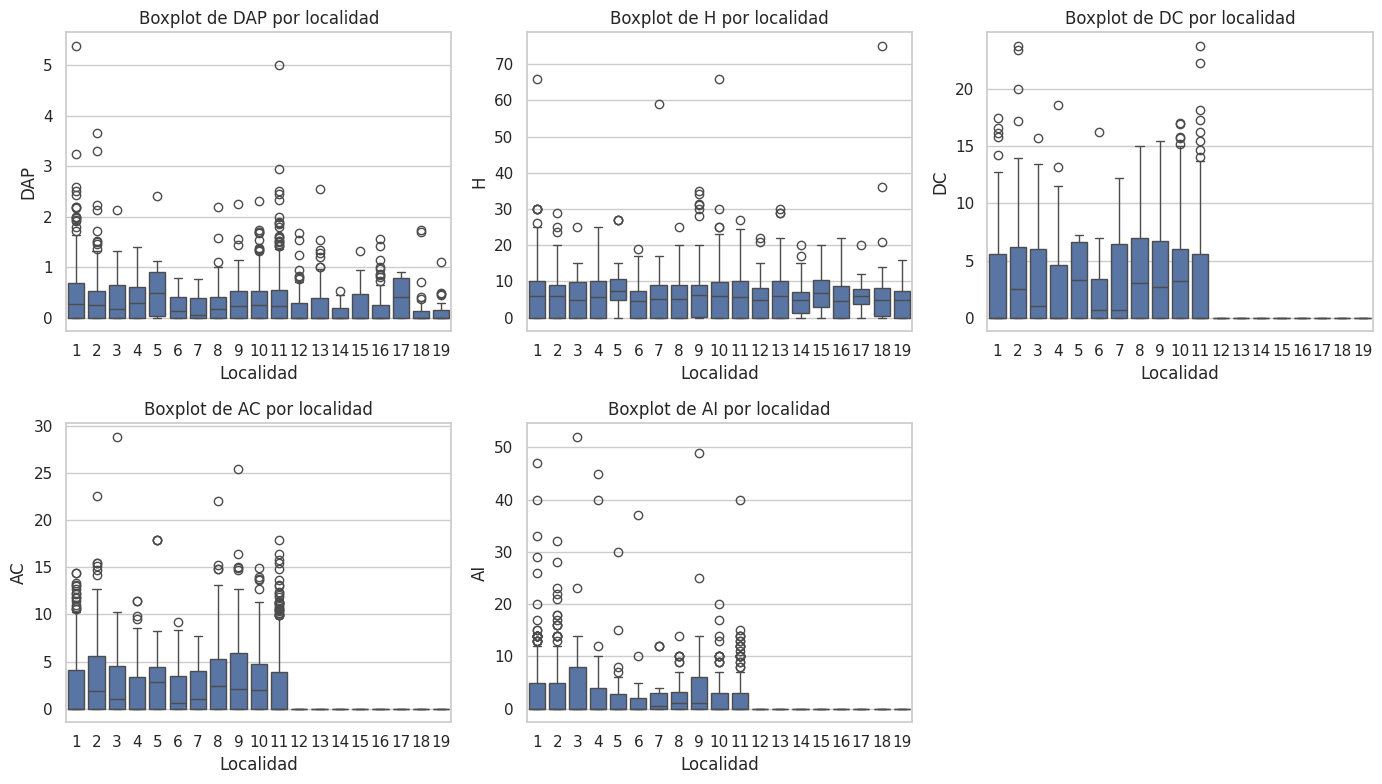

In [38]:
plt.figure(figsize=(14, 8))

# Itera sobre las variables y crea un subplot para cada una
variables = ['DAP', 'H', 'DC', 'AC', 'AI']
for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='LOC_COD', y=variable, data=df)
    plt.title(f'Boxplot de {variable} por localidad')
    plt.xlabel('Localidad')
    plt.ylabel(variable)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la visualización
plt.show()

Por localidad

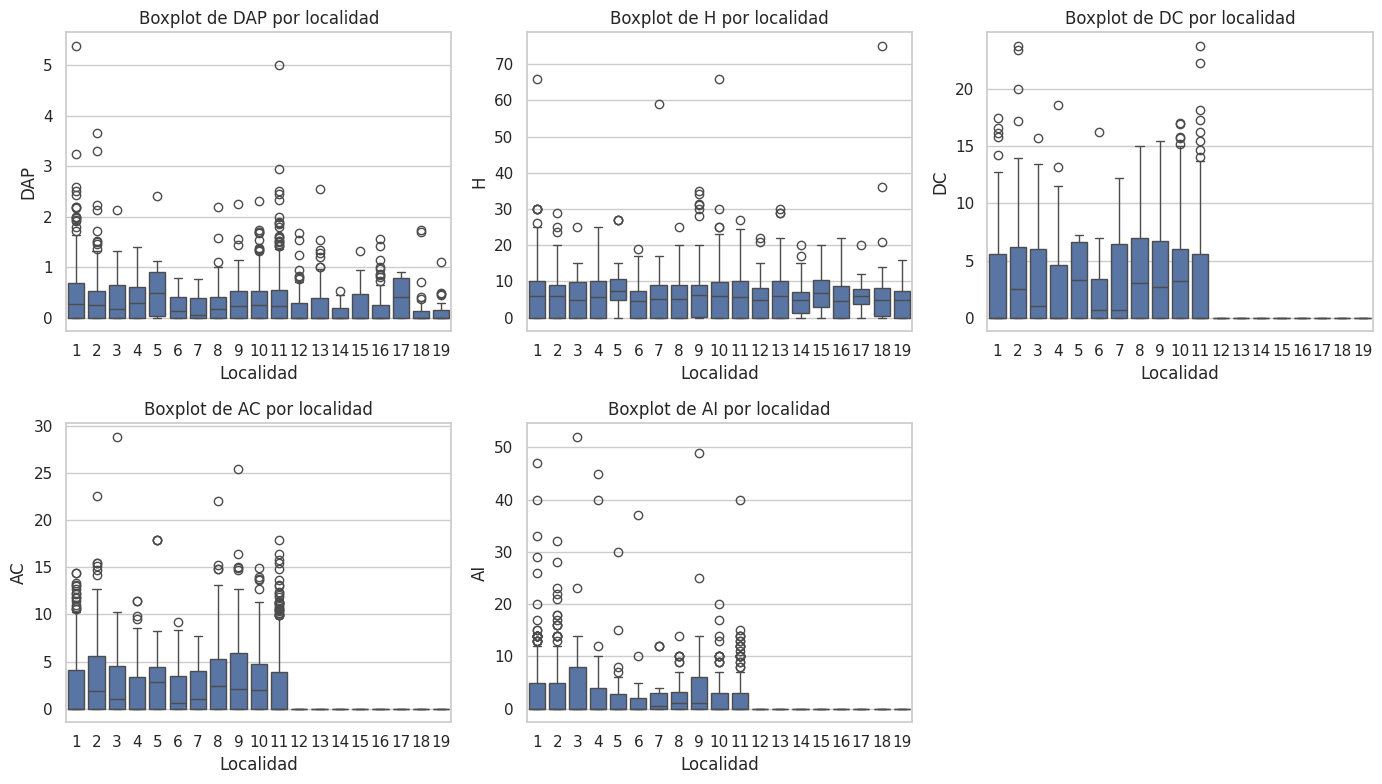

In [39]:
plt.figure(figsize=(14, 8))

# Itera sobre las variables y crea un subplot para cada una
variables = ['DAP', 'H', 'DC', 'AC', 'AI']
for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='LOC_COD', y=variable, data=df)
    plt.title(f'Boxplot de {variable} por localidad')
    plt.xlabel('Localidad')
    plt.ylabel(variable)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la visualización
plt.show()

Por especie

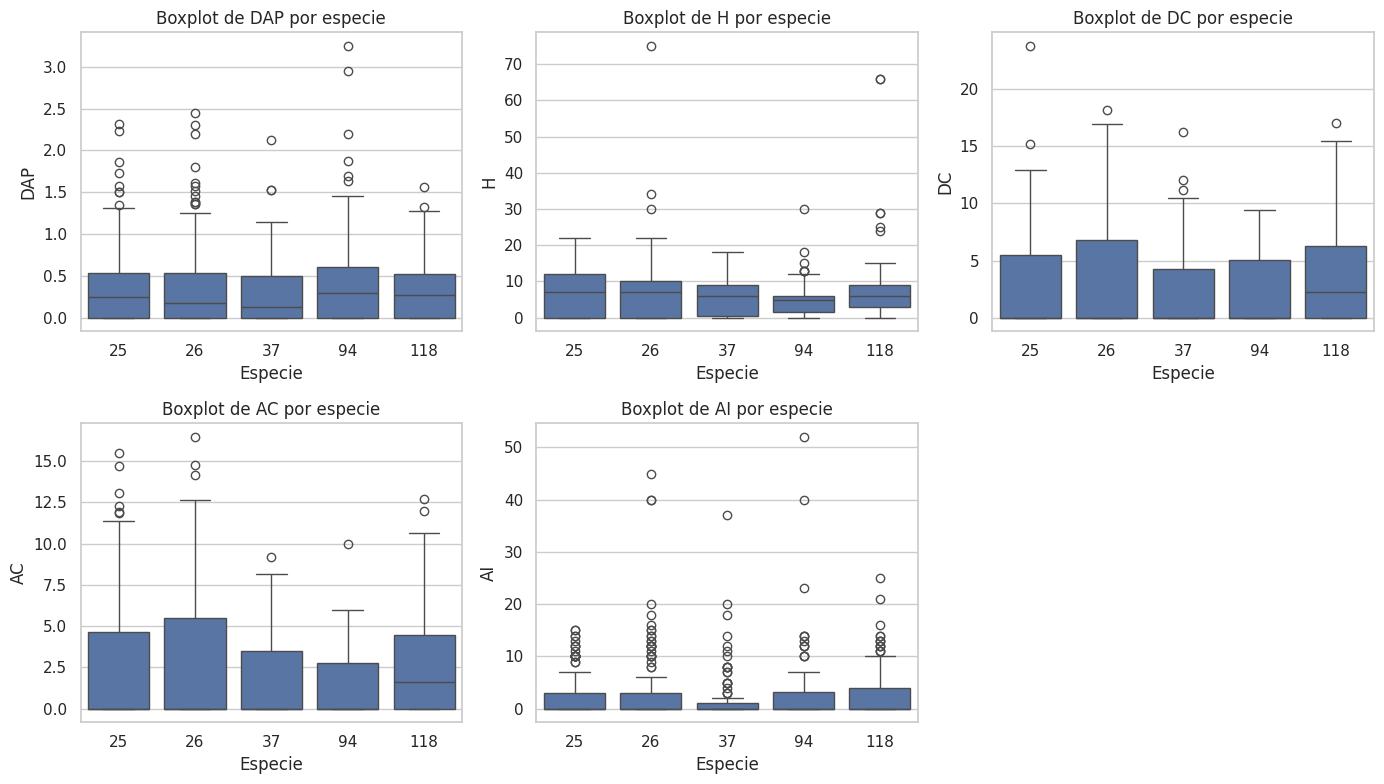

In [40]:
# Conteo de especies
especies_count = df['COD_ESPEC'].value_counts()

# Selecciona las especies más frecuentes (por ejemplo, las 5 especies más comunes)
top_especies = especies_count.head(5).index.tolist()

# Filtra el DataFrame original para incluir solo las observaciones correspondientes a las especies más comunes
df_top_especies = df[df['COD_ESPEC'].isin(top_especies)]

# Tamaño de la figura
plt.figure(figsize=(14, 8))

# Itera sobre las variables y crea un subplot para cada una
variables = ['DAP', 'H', 'DC', 'AC', 'AI']
for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='COD_ESPEC', y=variable, data=df_top_especies)
    plt.title(f'Boxplot de {variable} por especie')
    plt.xlabel('Especie')
    plt.ylabel(variable)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la visualización
plt.show()

Por emplazamiento

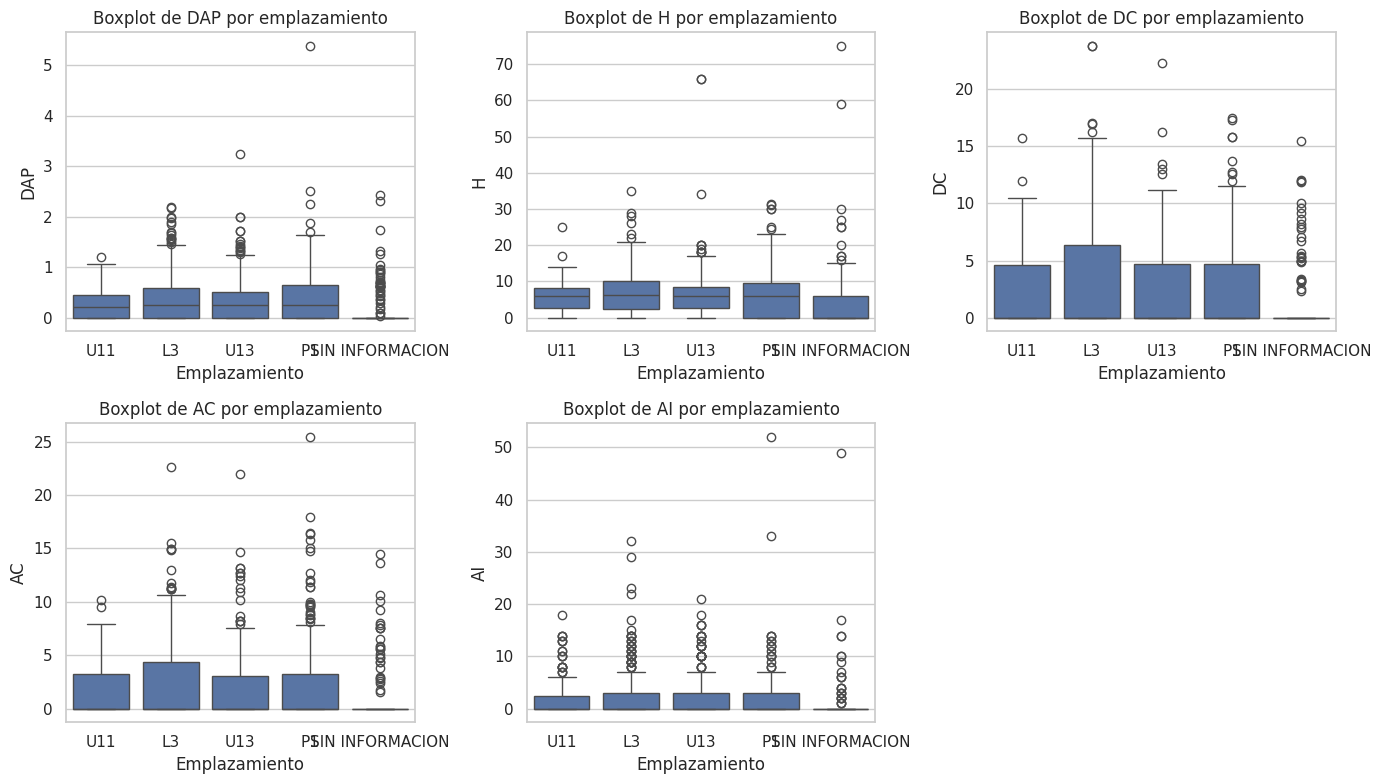

In [41]:
# Conteo de emplazamientos
emplazamientos_count = df['EM_COD'].value_counts()

# Selecciona los emplazamientos más frecuentes (por ejemplo, los 5 más comunes)
top_emplazamientos = emplazamientos_count.head(5).index.tolist()

# Filtra el DataFrame original para incluir solo las observaciones correspondientes a los emplazamientos más comunes
df_top_emplazamientos = df[df['EM_COD'].isin(top_emplazamientos)]

# Tamaño de la figura
plt.figure(figsize=(14, 8))

# Itera sobre las variables y crea un subplot para cada una
variables = ['DAP', 'H', 'DC', 'AC', 'AI']
for i, variable in enumerate(variables, start=1):
    plt.subplot(2, 3, i)
    sns.boxplot(x='EM_COD', y=variable, data=df_top_emplazamientos)
    plt.title(f'Boxplot de {variable} por emplazamiento')
    plt.xlabel('Emplazamiento')
    plt.ylabel(variable)

# Ajusta el espaciado entre los subplots
plt.tight_layout()

# Muestra la visualización
plt.show()

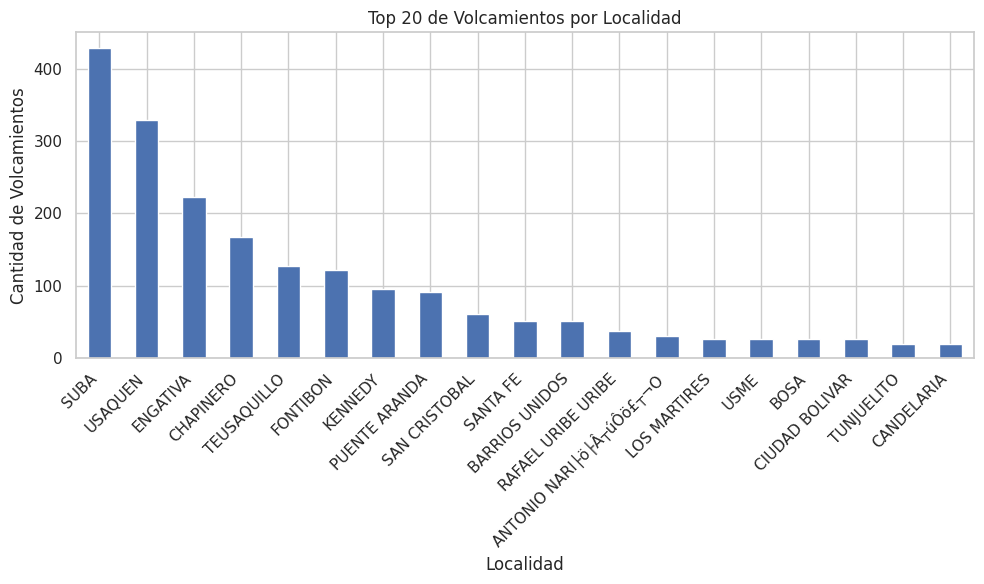

In [46]:
import matplotlib.pyplot as plt

# Realizar el conteo de volcamientos por localidad
conteo_volcamientos = df['LOC_NOM'].value_counts().head(20)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar los conteos de volcamientos
conteo_volcamientos.plot(kind='bar')

# Ajustar etiquetas y título
plt.xlabel('Localidad')
plt.ylabel('Cantidad de Volcamientos')
plt.title('Top 20 de Volcamientos por Localidad')

# Rotar las etiquetas del eje x
plt.xticks(rotation=45, ha='right')

# Mostrar la gráfica
plt.tight_layout()
plt.show()

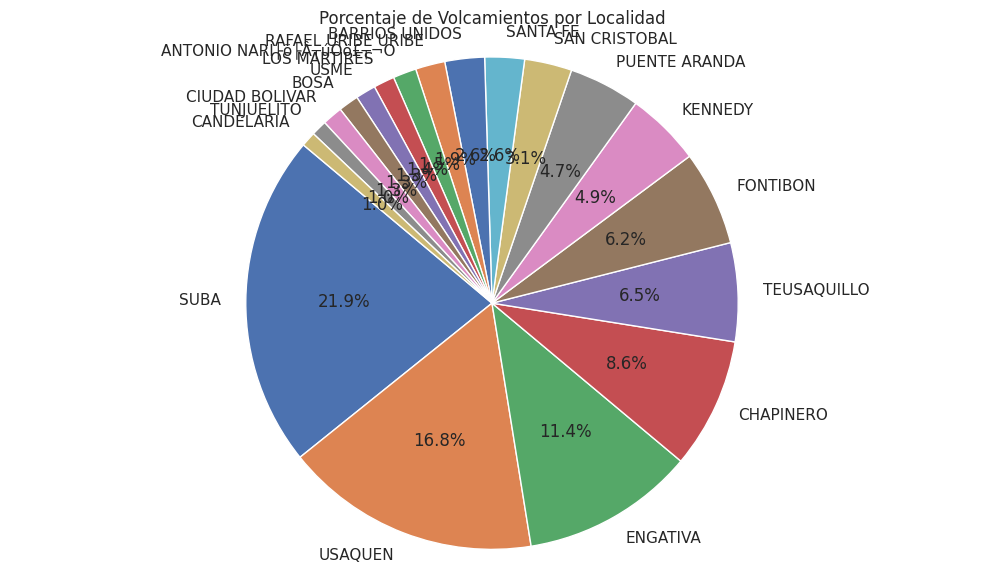

In [47]:
import matplotlib.pyplot as plt

# Realizar el conteo de volcamientos por localidad
conteo_volcamientos = df['LOC_NOM'].value_counts().head(20)

# Crear la figura y los ejes
plt.figure(figsize=(10, 6))

# Graficar el diagrama de torta
plt.pie(conteo_volcamientos, labels=conteo_volcamientos.index, autopct='%1.1f%%', startangle=140)

# Ajustar el título
plt.title('Porcentaje de Volcamientos por Localidad')

# Mostrar la gráfica
plt.axis('equal')  # Hace que el gráfico sea circular
plt.tight_layout()
plt.show()

In [44]:
# Guarda el DataFrame limpio en un archivo CSV
df.to_csv('/content/datos_limpios.csv', index=False)